# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="
# response = requests.get(query_url + city).json()
# pprint(response)


# set up lists to hold reponse info
finalcities = []
lat = []
lng = []
temp = []
date = []
humidity = []
country = []
cloudiness = []
wind = []
setcounter = 0
recordcounter = 1

# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    
    if i % 50 == 0:
        recordcounter = 1
        setcounter += 1
    
    print(f"Processing Record {recordcounter} of Set {setcounter} | {city}")
    try:
        response = requests.get(query_url + city).json()
        finalcities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
    except:
        print("City not found")
    recordcounter += 1 


Processing Record 1 of Set 2 | faya
Processing Record 2 of Set 2 | aklavik
Processing Record 3 of Set 2 | illoqqortoormiut
City not found
Processing Record 4 of Set 2 | constitucion
Processing Record 5 of Set 2 | jamestown
Processing Record 6 of Set 2 | kemijarvi
City not found
Processing Record 7 of Set 2 | tiksi
Processing Record 8 of Set 2 | vila velha
Processing Record 9 of Set 2 | atuona
Processing Record 10 of Set 2 | raudeberg
Processing Record 11 of Set 2 | farafangana
Processing Record 12 of Set 2 | palabuhanratu
City not found
Processing Record 13 of Set 2 | mys shmidta
City not found
Processing Record 14 of Set 2 | georgetown
Processing Record 15 of Set 2 | rikitea
Processing Record 16 of Set 2 | tarnos
Processing Record 17 of Set 2 | zyryanka
Processing Record 18 of Set 2 | albany
Processing Record 19 of Set 2 | bluff
Processing Record 20 of Set 2 | yellowknife
Processing Record 21 of Set 2 | richards bay
Processing Record 22 of Set 2 | wick
Processing Record 23 of Set 2 | 

Processing Record 41 of Set 5 | matara
Processing Record 42 of Set 5 | san policarpo
Processing Record 43 of Set 5 | sao gabriel
Processing Record 44 of Set 5 | bereda
Processing Record 45 of Set 5 | tazovskiy
Processing Record 46 of Set 5 | los llanos de aridane
Processing Record 47 of Set 5 | adrar
Processing Record 48 of Set 5 | cam pha
City not found
Processing Record 49 of Set 5 | odweyne
City not found
Processing Record 50 of Set 5 | sorong
Processing Record 1 of Set 6 | broken hill
Processing Record 2 of Set 6 | vangaindrano
Processing Record 3 of Set 6 | lujan
Processing Record 4 of Set 6 | port alfred
Processing Record 5 of Set 6 | narsaq
Processing Record 6 of Set 6 | meulaboh
Processing Record 7 of Set 6 | fleetwood
Processing Record 8 of Set 6 | okha
Processing Record 9 of Set 6 | severo-kurilsk
Processing Record 10 of Set 6 | mar del plata
Processing Record 11 of Set 6 | kadykchan
City not found
Processing Record 12 of Set 6 | tarko-sale
Processing Record 13 of Set 6 | kan

City not found
Processing Record 31 of Set 9 | samarai
Processing Record 32 of Set 9 | husavik
Processing Record 33 of Set 9 | fairbanks
Processing Record 34 of Set 9 | north battleford
Processing Record 35 of Set 9 | pangnirtung
Processing Record 36 of Set 9 | verkhnevilyuysk
Processing Record 37 of Set 9 | bilibino
Processing Record 38 of Set 9 | hay river
Processing Record 39 of Set 9 | komyshuvakha
Processing Record 40 of Set 9 | ordynskoye
Processing Record 41 of Set 9 | chapais
Processing Record 42 of Set 9 | barentsburg
City not found
Processing Record 43 of Set 9 | cedar city
Processing Record 44 of Set 9 | agadir
Processing Record 45 of Set 9 | sobolevo
Processing Record 46 of Set 9 | ambrolauri
Processing Record 47 of Set 9 | okakarara
Processing Record 48 of Set 9 | ambilobe
Processing Record 49 of Set 9 | krutaya gorka
Processing Record 50 of Set 9 | atambua
Processing Record 1 of Set 10 | arrifes
Processing Record 2 of Set 10 | morondava
Processing Record 3 of Set 10 | mar

Processing Record 19 of Set 13 | guiratinga
Processing Record 20 of Set 13 | bull savanna
Processing Record 21 of Set 13 | santa cruz del sur
Processing Record 22 of Set 13 | mildura
Processing Record 23 of Set 13 | rosetta
Processing Record 24 of Set 13 | pangoa
Processing Record 25 of Set 13 | gandajika
Processing Record 26 of Set 13 | frolovo
Processing Record 27 of Set 13 | kantunilkin
Processing Record 28 of Set 13 | halalo
City not found
Processing Record 29 of Set 13 | ayagoz
Processing Record 30 of Set 13 | ust-tsilma
Processing Record 31 of Set 13 | orlovka
Processing Record 32 of Set 13 | conde
Processing Record 33 of Set 13 | korla
City not found
Processing Record 34 of Set 13 | olinda
Processing Record 35 of Set 13 | governador valadares
Processing Record 36 of Set 13 | shieli
Processing Record 37 of Set 13 | ratnagiri
Processing Record 38 of Set 13 | ahuimanu
Processing Record 39 of Set 13 | koyilandi
City not found
Processing Record 40 of Set 13 | jorochito
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "City": finalcities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Faya,40,SA,1551841200,82,18.39,42.45,13.00,3.60
1,Aklavik,20,CA,1551841200,56,68.22,-135.01,-9.00,2.10
2,Constitucion,5,MX,1551840480,14,23.99,-104.67,21.00,1.50
3,Jamestown,20,AU,1551843746,79,-33.21,138.60,16.88,5.82
4,Tiksi,64,RU,1551842075,67,71.64,128.87,-12.48,4.67
5,Vila Velha,75,BR,1551843496,88,-3.71,-38.60,26.67,3.10
6,Atuona,92,PF,1551841772,100,-9.80,-139.03,27.05,6.82
7,Raudeberg,92,NO,1551843603,80,61.99,5.14,4.00,4.60
8,Farafangana,92,MG,1551843747,100,-22.82,47.83,23.88,4.47
9,Georgetown,68,GY,1551841771,77,6.80,-58.16,25.43,3.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

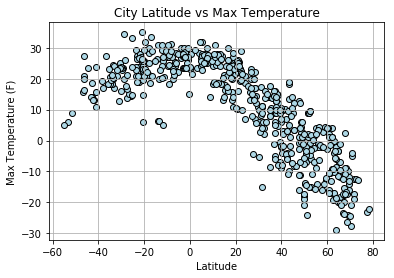

In [27]:
plt.scatter(lat, temp, marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#plt.xlim(-70, 90)
#plt.ylim(-40, 60)

#### Latitude vs. Humidity Plot

(0, 110)

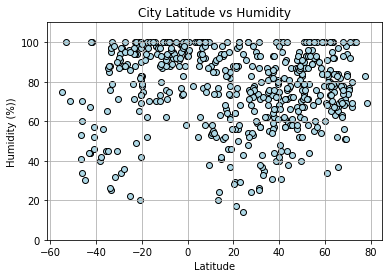

In [28]:
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.ylim(0, 110)

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

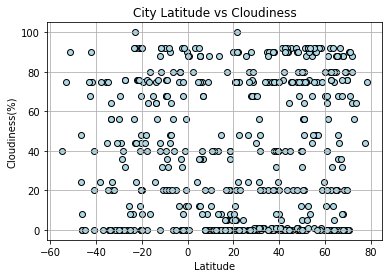

In [29]:
plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

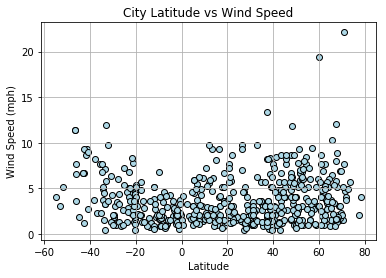

In [30]:
plt.scatter(lat, wind, marker="o", facecolors="lightblue", edgecolors="black")
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")